In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load file into a DataFrame
df_exams = pd.read_csv('./datasets/diabetes_exams.csv')

In [16]:
# Visualize the data
df_exams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_patient  100 non-null    int64 
 1   gender      100 non-null    object
 2   age         100 non-null    int64 
 3   weight      100 non-null    int64 
 4   height      100 non-null    int64 
 5   result      100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [17]:
# Show first 10 rows
df_exams.head(10)

,id_patient,gender,age,weight,height,result
0,1,M,46,83,165,98
1,2,F,23,83,164,82
2,3,M,39,71,154,93
3,4,F,26,103,165,95
4,5,M,27,55,176,100
5,6,M,64,93,190,117
6,7,F,21,70,182,90
7,8,F,60,101,179,84
8,9,F,63,83,189,92
9,10,F,65,78,175,121


In [18]:
df_exams['gender'].unique()

array(['M', 'F'], dtype=object)

In [19]:
# Remmove id_patient column
df_exams.drop('id_patient', axis=1, inplace=True)

In [20]:
# Convert a categorical variable (gender) into numerical, using one-hot encoding
df_exams = pd.get_dummies(df_exams, columns=['gender'], dtype='int64')

In [21]:
df_exams.head(10)

,age,weight,height,result,gender_F,gender_M
0,46,83,165,98,0,1
1,23,83,164,82,1,0
2,39,71,154,93,0,1
3,26,103,165,95,1,0
4,27,55,176,100,0,1
5,64,93,190,117,0,1
6,21,70,182,90,1,0
7,60,101,179,84,1,0
8,63,83,189,92,1,0
9,65,78,175,121,1,0


<Axes: >

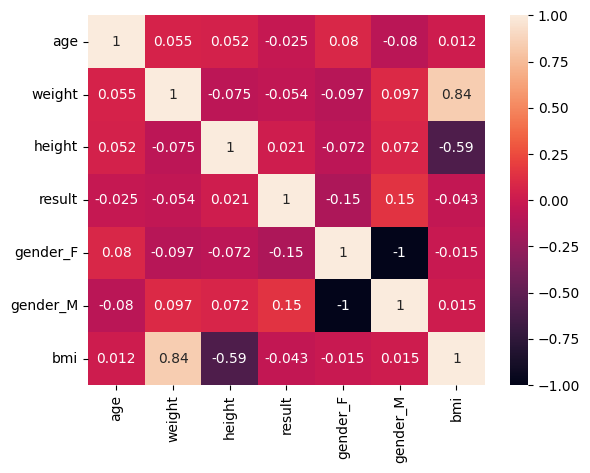

In [29]:
# Present Heat Map with correlation between variables
sns.heatmap(df_exams.corr(), vmin=-1, vmax=1, annot=True)

<Axes: >

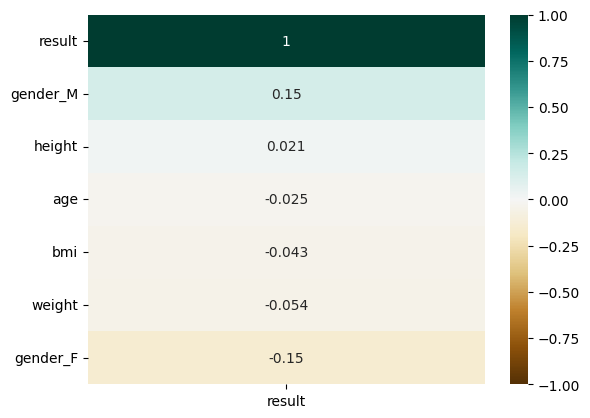

In [30]:
# Correlation map with the target variable
sns.heatmap(df_exams.corr()[['result']].sort_values(by='result', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='weight', ylabel='age'>,
        <Axes: xlabel='height', ylabel='age'>,
        <Axes: xlabel='result', ylabel='age'>,
        <Axes: xlabel='gender_F', ylabel='age'>,
        <Axes: xlabel='gender_M', ylabel='age'>,
        <Axes: xlabel='bmi', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='weight'>,
        <Axes: xlabel='weight', ylabel='weight'>,
        <Axes: xlabel='height', ylabel='weight'>,
        <Axes: xlabel='result', ylabel='weight'>,
        <Axes: xlabel='gender_F', ylabel='weight'>,
        <Axes: xlabel='gender_M', ylabel='weight'>,
        <Axes: xlabel='bmi', ylabel='weight'>],
       [<Axes: xlabel='age', ylabel='height'>,
        <Axes: xlabel='weight', ylabel='height'>,
        <Axes: xlabel='height', ylabel='height'>,
        <Axes: xlabel='result', ylabel='height'>,
        <Axes: xlabel='gender_F', ylabel='height'>,
        <Axes: xlabel='gender_M', ylabel='height'>,
        <Axes: xlabel=

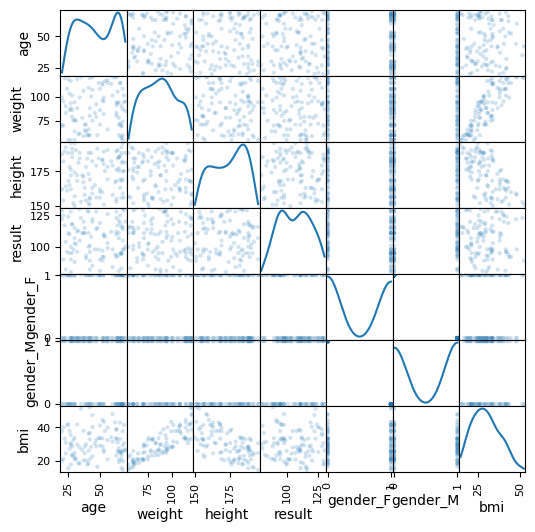

In [31]:
# Scatter Plot with distribution
pd.plotting.scatter_matrix(df_exams, alpha=0.2, figsize=(6, 6), diagonal='kde')

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'result'}>],
       [<Axes: title={'center': 'gender_F'}>,
        <Axes: title={'center': 'gender_M'}>,
        <Axes: title={'center': 'bmi'}>, <Axes: >]], dtype=object)

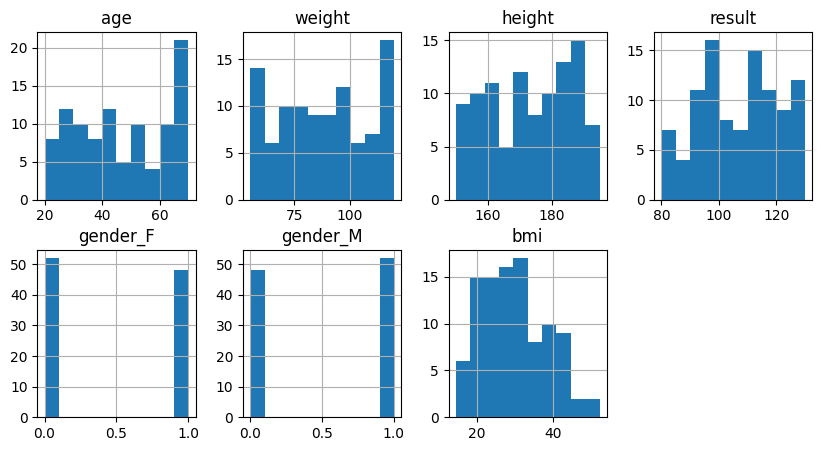

In [33]:
# Histogram of all variables
df_exams.hist(layout=(2, 4), figsize=(10, 5))

In [26]:
# Create a new feature
# BMI = weight / height^2
df_exams['bmi'] = df_exams['weight'] / (df_exams['height'] / 100) ** 2

In [27]:
df_exams.head(10)

,age,weight,height,result,gender_F,gender_M,bmi
0,46,83,165,98,0,1,30.486685
1,23,83,164,82,1,0,30.859607
2,39,71,154,93,0,1,29.937595
3,26,103,165,95,1,0,37.832874
4,27,55,176,100,0,1,17.755682
5,64,93,190,117,0,1,25.761773
6,21,70,182,90,1,0,21.132713
7,60,101,179,84,1,0,31.522112
8,63,83,189,92,1,0,23.235632
9,65,78,175,121,1,0,25.469388


In [28]:
df_exams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       100 non-null    int64  
 1   weight    100 non-null    int64  
 2   height    100 non-null    int64  
 3   result    100 non-null    int64  
 4   gender_F  100 non-null    int64  
 5   gender_M  100 non-null    int64  
 6   bmi       100 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 5.6 KB


In [34]:
dict_regression = {
  'years_of_service': [1, 3, 6, 9, 10, 14, 18],
  'wage': [1500, 3000, 4500, 6000, 7000, 8500, 10000]
}

In [35]:
df_simple_regression = pd.DataFrame.from_dict(dict_regression)

<Axes: xlabel='years_of_service', ylabel='wage'>

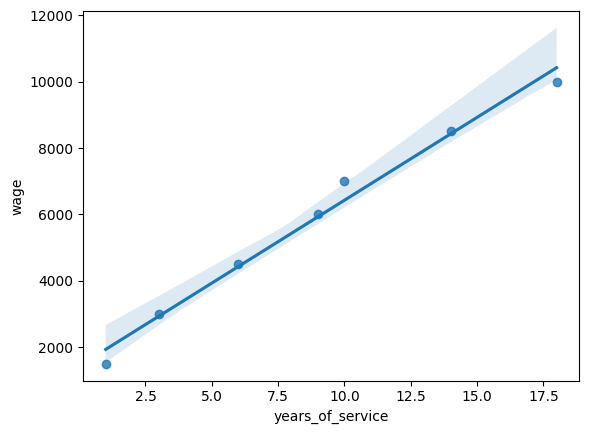

In [36]:
sns.regplot(x='years_of_service', y='wage', data=df_simple_regression)

In [37]:
# Import sklearn libs
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
# Model 1 – Without BMI
X = df_exams.drop(['result', 'bmi'], axis=1)
y = df_exams['result']

In [41]:
# Separate data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=51)

In [45]:
# Train linear regression algorithm – Model 1
model_1 = LinearRegression().fit(X_train, y_train)

In [46]:
# Generate predictions for the test data in Model 1
y_pred = model_1.predict(X_test)

In [47]:
# Line equation – Linear Regression
# y = ax + b
model_1.coef_

array([ 0.16800999,  0.04991879,  0.24968347,  1.86191691, -1.86191691])

In [48]:
model_1.intercept_

np.float64(51.1350366296828)

In [49]:
# R2 Score – Training Data
model_1.score(X_train, y_train)

0.07260818476640651

In [52]:
# R2 Score – Test Data
model_1.score(X_test, y_test)

-0.26391790040217455

In [53]:
# R2 Score – Tests
r2_score(y_test, y_pred)

-0.26391790040217455

In [54]:
# MAE – Mean Absolute Error
mean_squared_error(y_test, y_pred)

247.5071097598988

In [55]:
# Second Model – Just BMI
X = pd.DataFrame(df_exams['bmi'])
y = df_exams['result']

In [56]:
# Separate data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=51)

In [57]:
# Train linear regression algorithm – Model 2
model_2 = LinearRegression().fit(X_train, y_train)

In [58]:
# Generate predictions for the test data in Model 2
y_pred = model_2.predict(X_test)

In [59]:
model_2.coef_

array([-0.11063088])

In [60]:
model_2.intercept_

np.float64(111.25271478972051)

In [61]:
# R2 Score – Training Data
model_2.score(X_train, y_train)

0.004837831252090696

In [62]:
# R2 Score – Test Data
model_2.score(X_test, y_test)

-0.0270189255949409

In [63]:
# MAE – Mean Absolute Error
mean_squared_error(y_test, y_pred)

201.11629549817795

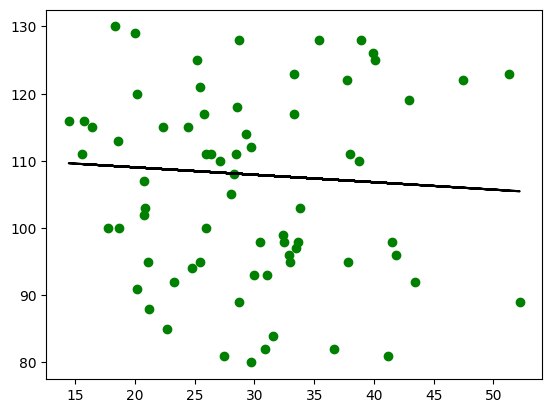

In [65]:
# Show how the line was calculated
plt.scatter(X_test, y_test, color='g')
plt.plot(X_test, y_pred, color='k')